### ANother code 

2024-08-06 08:35:17.078487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 08:35:18.024038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Train Images


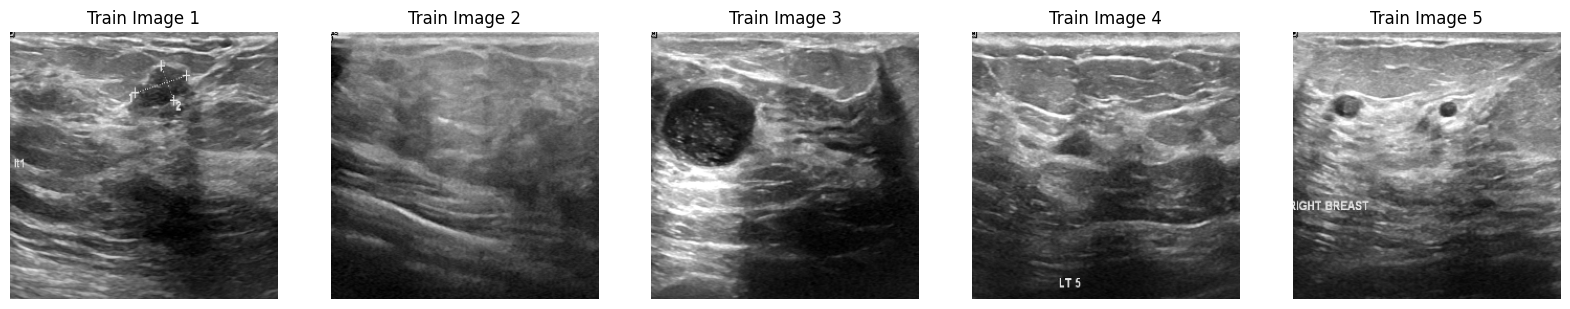

Validation Images


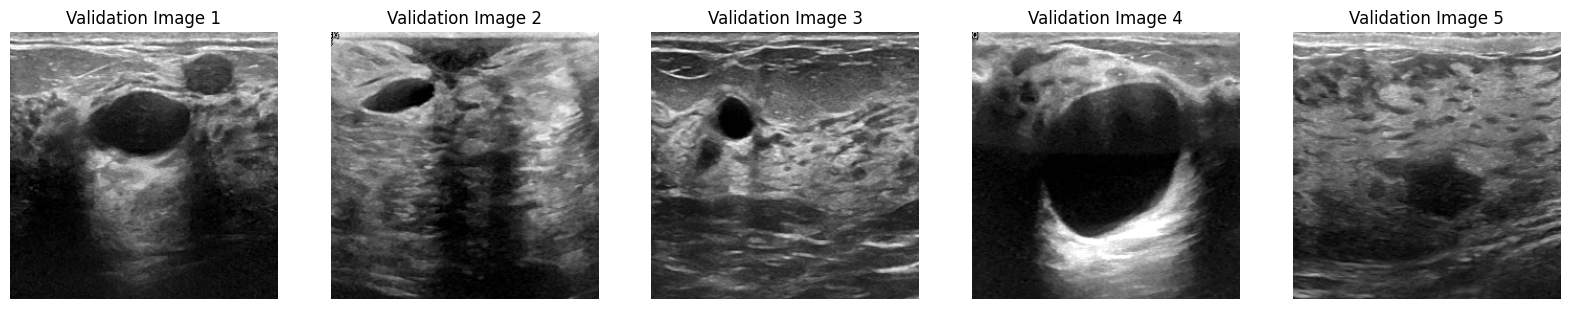

Test Images


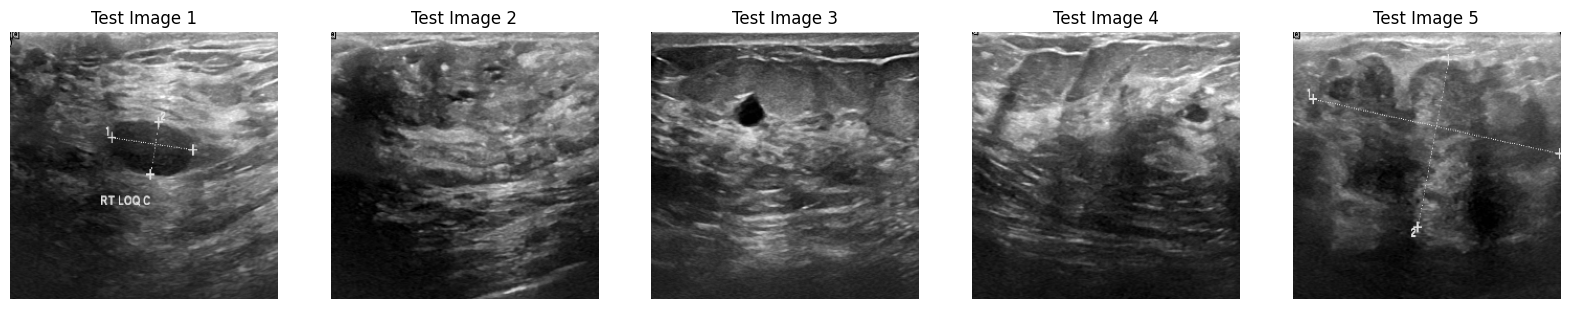

2024-08-06 08:35:27.306703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 08:35:27.349075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 08:35:27.349345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

2024-08-06 08:35:29.528029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-08-06 08:35:33.641934: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-06 08:35:35.077556: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8903
2024-08-06 08:35:38.826925: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55f7c40d8b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-06 08:35:38.826963: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device 

15/15 [==============================] - ETA: 0s - loss: 32.5411 - accuracy: 0.0029

2024-08-06 08:35:56.423192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 28s 491ms/step - loss: 32.5411 - accuracy: 0.0029 - val_loss: 30.5262 - val_accuracy: 0.0027
Epoch 2/50
15/15 [==============================] - 4s 264ms/step - loss: 28.8498 - accuracy: 0.0029 - val_loss: 27.1016 - val_accuracy: 0.0027
Epoch 3/50
15/15 [==============================] - 4s 265ms/step - loss: 25.6750 - accuracy: 0.0029 - val_loss: 24.0628 - val_accuracy: 0.0027
Epoch 4/50
15/15 [==============================] - 4s 266ms/step - loss: 22.7683 - accuracy: 0.0029 - val_loss: 21.3781 - val_accuracy: 0.0027
Epoch 5/50
15/15 [==============================] - 4s 265ms/step - loss: 20.3022 - accuracy: 0.0029 - val_loss: 19.0072 - val_accuracy: 0.0027
Epoch 6/50
15/15 [==============================] - 5s 299ms/step - loss: 18.0650 - accuracy: 0.0029 - val_loss: 16.9118 - val_accuracy: 0.0027
Epoch 7/50
15/15 [==============================] - 4s 264ms/step - loss: 16.0056 - accuracy: 0.0029 - val_loss: 15.0593 - val_accuracy: 0.0027
Ep

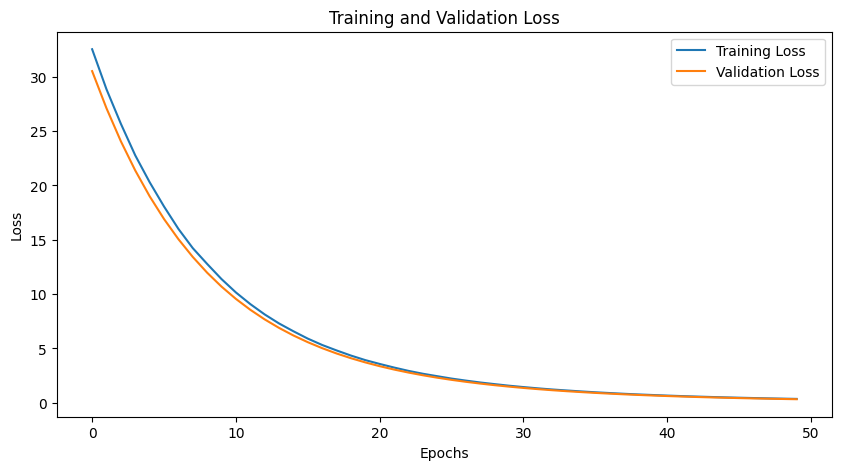

1/1 [==============================] - 0s 296ms/step


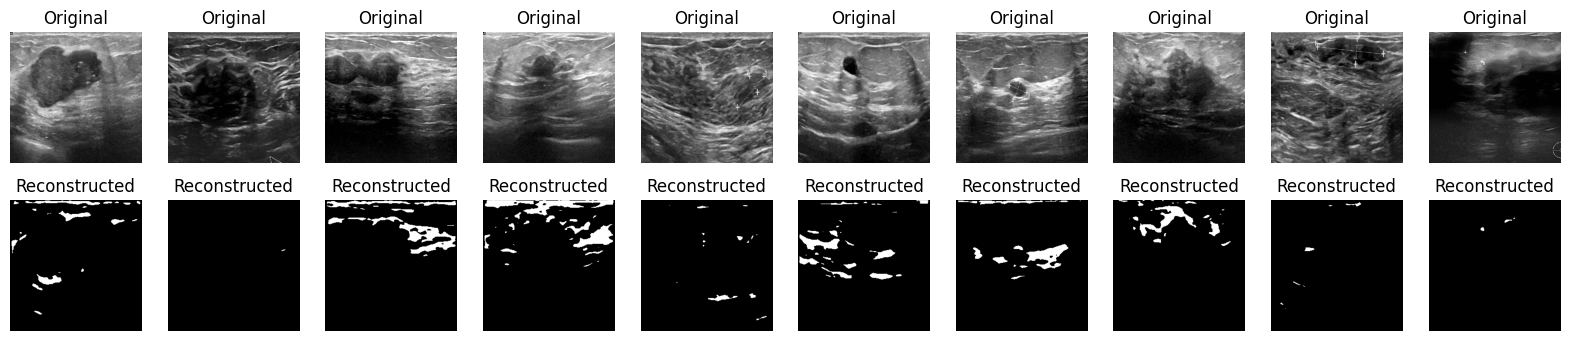

2/4 [==============>...............] - ETA: 0s - loss: 0.3264 - accuracy: 0.0036

2024-08-06 08:39:21.947007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 1s 243ms/step - loss: 0.3269 - accuracy: 0.0040
Test Loss: 0.3268565237522125
Test Accuracy: 0.004047316033393145


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import cv2

# Define paths
base_dir = '/home/ubuntu/BCS/Breast_Cancer_Segmentation/Dataset_BUSI_with_GT'
subfolders = ['benign', 'malignant']

# Function to load and filter images excluding those ending with masl.png
def load_images(folder_path):
    images = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (256, 256))
                img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                images.append(img)
    return np.expand_dims(images, axis=-1)  # Add channel dimension

# Function to create datasets
def create_datasets(base_dir, subfolders):
    train_images, validation_images, test_images = [], [], []
    for folder in subfolders:
        folder_path = os.path.join(base_dir, folder)
        images = load_images(folder_path)
        split_1 = int(0.7 * len(images))
        split_2 = int(0.85 * len(images))
        train_images.extend(images[:split_1])
        validation_images.extend(images[split_1:split_2])
        test_images.extend(images[split_2:])
    return np.array(train_images), np.array(validation_images), np.array(test_images)

train_images, validation_images, test_images = create_datasets(base_dir, subfolders)

# Function to visualize images
def visualize_images(images, title, num_images=5):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

# Visualize loaded images
print("Train Images")
visualize_images(train_images, "Train Image")

print("Validation Images")
visualize_images(validation_images, "Validation Image")

print("Test Images")
visualize_images(test_images, "Test Image")

# Data augmentation and scaling
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Create augmented data generators
train_generator = train_datagen.flow(train_images, train_images, batch_size=32)
validation_generator = validation_datagen.flow(validation_images, validation_images, batch_size=32)
test_generator = test_datagen.flow(test_images, test_images, batch_size=32)

# Define U-Net Model with Regularization and Dropout for grayscale images
def unet_autoencoder(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = layers.Dropout(0.5)(pool1)

    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool1)
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = layers.Dropout(0.5)(pool2)

    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool2)
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = layers.Dropout(0.5)(pool3)

    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool3)
    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = layers.Dropout(0.5)(pool4)

    # Bottleneck
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool4)
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv5)
    conv5 = layers.Dropout(0.5)(conv5)

    # Decoder
    up6 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv5))
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge6)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv6)

    up7 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge7)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv7)

    up8 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge8)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv8)

    up9 = layers.Conv2D(32, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge9)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv9)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv9)
    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])

    return model

autoencoder = unet_autoencoder()
autoencoder.summary()

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the autoencoder with early stopping
history = autoencoder.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stopping])

# Save the trained model
autoencoder.save('breast_cancer_autoencoder.h5')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to plot original and reconstructed images
def plot_reconstructed_images(original_images, reconstructed_images, n=10, threshold=0.5):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        reconstructed_image = reconstructed_images[i].squeeze()
        # Apply threshold to binarize the image
        reconstructed_image = (reconstructed_image > threshold).astype(np.uint8)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Get a batch of images from the test set
test_images, _ = next(iter(test_generator))
# Get the reconstructed images
reconstructed_images = autoencoder.predict(test_images)

# Ensure the reconstructed images are in the range [0, 1]
reconstructed_images = np.clip(reconstructed_images, 0, 1)

# Plot original and reconstructed images with cancer tissue highlighted
plot_reconstructed_images(test_images, reconstructed_images, n=10, threshold=0.5)

# Evaluate on the test set
test_loss, test_accuracy = autoencoder.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 0s 24ms/step


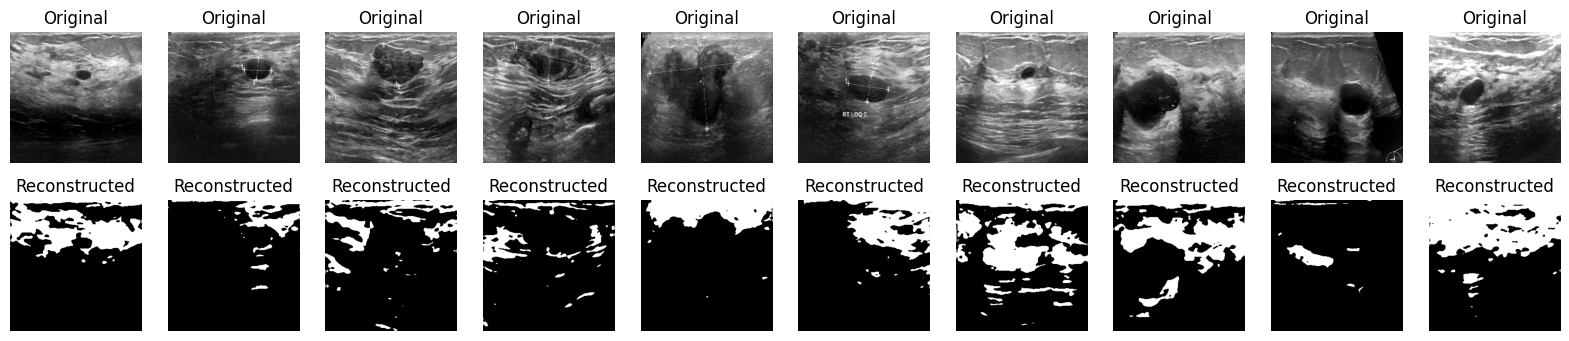

2/4 [==============>...............] - ETA: 0s - loss: 0.3269 - accuracy: 0.0043

2024-08-06 08:39:24.551474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 0s 43ms/step - loss: 0.3269 - accuracy: 0.0040
Test Loss: 0.3268565237522125
Test Accuracy: 0.004047316033393145


In [2]:
# Function to plot original and reconstructed images
def plot_reconstructed_images(original_images, reconstructed_images, n=10, threshold=0.45):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        reconstructed_image = reconstructed_images[i].squeeze()
        # Apply threshold to binarize the image
        reconstructed_image = (reconstructed_image > threshold).astype(np.uint8)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Get a batch of images from the test set
test_images, _ = next(iter(test_generator))
# Get the reconstructed images
reconstructed_images = autoencoder.predict(test_images)

# Ensure the reconstructed images are in the range [0, 1]
reconstructed_images = np.clip(reconstructed_images, 0, 1)

# Plot original and reconstructed images with cancer tissue highlighted
plot_reconstructed_images(test_images, reconstructed_images, n=10, threshold=0.45)

# Evaluate on the test set
test_loss, test_accuracy = autoencoder.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Train Images


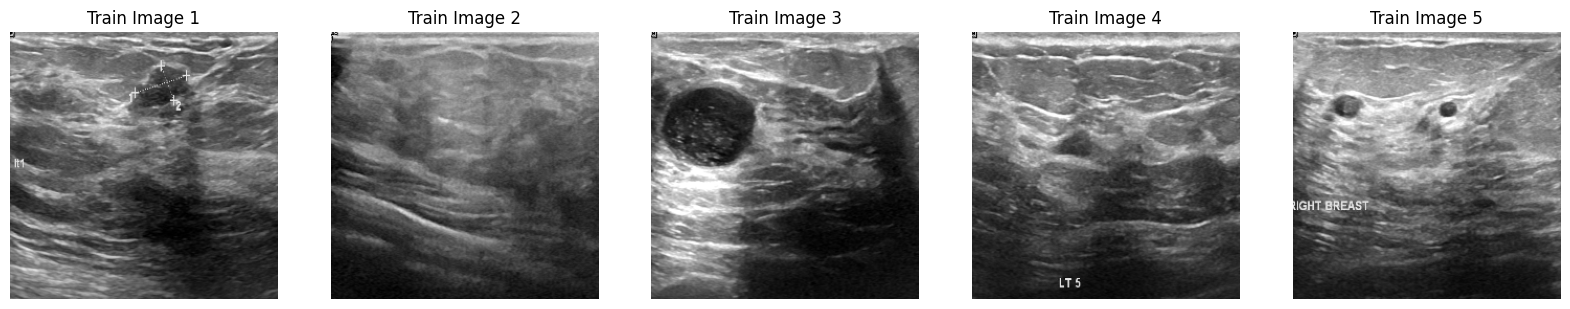

Validation Images


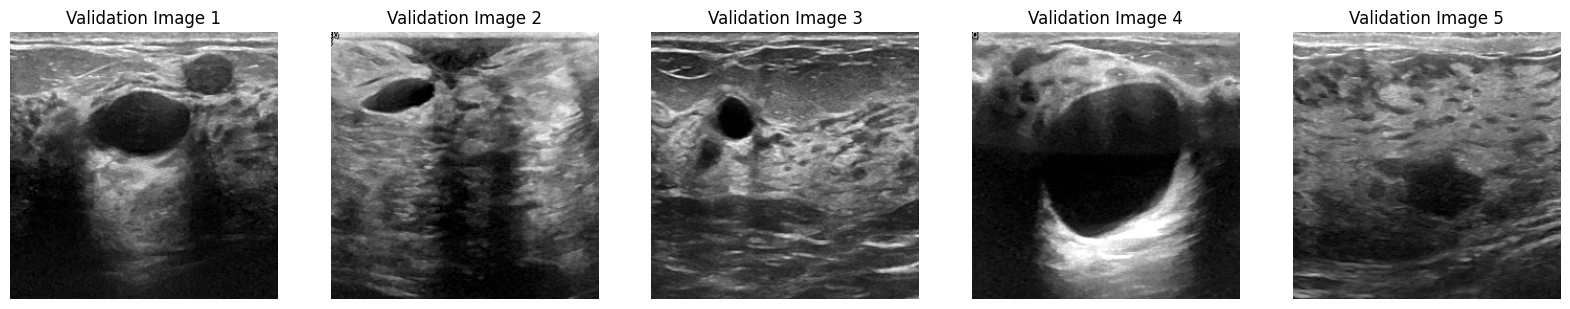

Test Images


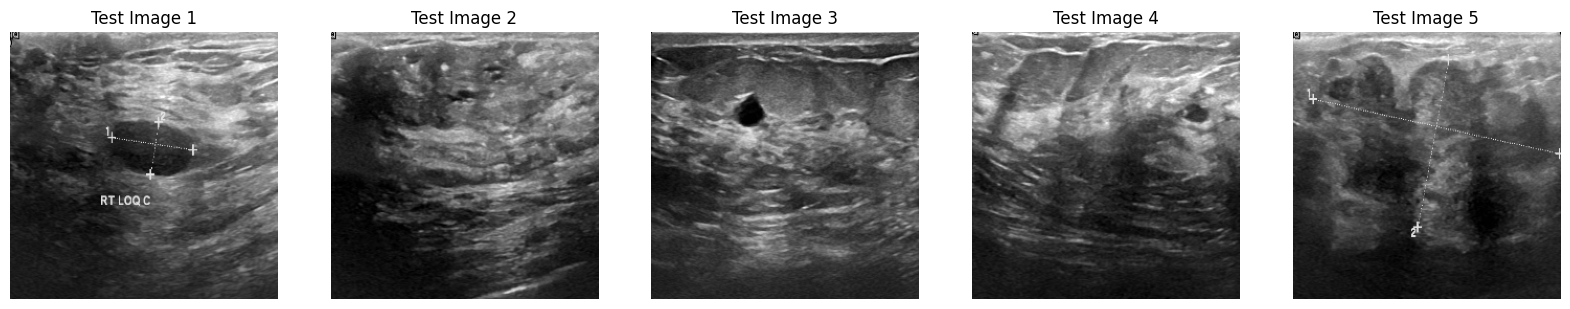

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 256, 256, 32  320         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_24[0][0]']              
                                )                                                           

2024-08-06 08:39:31.755587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-08-06 08:39:35.052539: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 9/15 [=================>............] - ETA: 1s - loss: 4.0207 - accuracy: 0.0028

14/15 [===========================>..] - ETA: 0s - loss: 3.9583 - accuracy: 0.0028

2024-08-06 08:39:44.298194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 13s 290ms/step - loss: 3.9566 - accuracy: 0.0028 - val_loss: 3.7493 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 2/50
15/15 [==============================] - 4s 265ms/step - loss: 3.5924 - accuracy: 0.0029 - val_loss: 3.4061 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 3/50
15/15 [==============================] - 4s 262ms/step - loss: 3.2493 - accuracy: 0.0029 - val_loss: 3.0901 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 4/50
15/15 [==============================] - 4s 264ms/step - loss: 2.9458 - accuracy: 0.0029 - val_loss: 2.7600 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 5/50
15/15 [==============================] - 4s 265ms/step - loss: 2.6540 - accuracy: 0.0029 - val_loss: 2.5719 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 6/50
15/15 [==============================] - 4s 263ms/step - loss: 2.4638 - accuracy: 0.0029 - val_loss: 2.4098 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 7/50
15/15 [==============================] - 4s 2

KeyboardInterrupt: 

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2

# Define paths
base_dir = '/home/ubuntu/BCS/Breast_Cancer_Segmentation/Dataset_BUSI_with_GT'
subfolders = ['benign', 'malignant']

# Function to load and filter images excluding those ending with _mask.png
def load_images(folder_path):
    images = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.png') and not file.endswith('_mask.png'):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (256, 256))
                img = img.astype('float32') / 255.0
                images.append(img)
    return np.expand_dims(images, axis=-1)  # Add channel dimension

# Function to create datasets
def create_datasets(base_dir, subfolders):
    train_images, validation_images, test_images = [], [], []
    for folder in subfolders:
        folder_path = os.path.join(base_dir, folder)
        images = load_images(folder_path)
        split_1 = int(0.7 * len(images))
        split_2 = int(0.85 * len(images))
        train_images.extend(images[:split_1])
        validation_images.extend(images[split_1:split_2])
        test_images.extend(images[split_2:])
    return np.array(train_images), np.array(validation_images), np.array(test_images)

train_images, validation_images, test_images = create_datasets(base_dir, subfolders)

# Function to visualize images
def visualize_images(images, title, num_images=5):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

# Visualize loaded images
print("Train Images")
visualize_images(train_images, "Train Image")

print("Validation Images")
visualize_images(validation_images, "Validation Image")

print("Test Images")
visualize_images(test_images, "Test Image")

# Data augmentation and scaling
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Create augmented data generators
train_generator = train_datagen.flow(train_images, train_images, batch_size=32)
validation_generator = validation_datagen.flow(validation_images, validation_images, batch_size=32)
test_generator = test_datagen.flow(test_images, test_images, batch_size=32)

# Define U-Net Model with Regularization and Dropout for grayscale images
def unet_autoencoder(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = layers.Dropout(0.3)(pool1)

    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(pool1)
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = layers.Dropout(0.3)(pool2)

    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(pool2)
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = layers.Dropout(0.3)(pool3)

    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(pool3)
    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = layers.Dropout(0.3)(pool4)

    # Bottleneck
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(pool4)
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv5)
    conv5 = layers.Dropout(0.3)(conv5)

    # Decoder
    up6 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(layers.UpSampling2D(size=(2, 2))(conv5))
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(merge6)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv6)

    up7 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(merge7)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv7)

    up8 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(merge8)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv8)

    up9 = layers.Conv2D(32, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(merge9)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv9)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(conv9)
    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

autoencoder = unet_autoencoder()
autoencoder.summary()

# Add Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Training the autoencoder with early stopping and learning rate reduction
history = autoencoder.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stopping, reduce_lr])

# Save the trained model
autoencoder.save('breast_cancer_autoencoder2.h5')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to plot original and reconstructed images
def plot_reconstructed_images(original_images, reconstructed_images, n=10, threshold=0.5):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        reconstructed_image = reconstructed_images[i].squeeze()
        # Apply threshold to binarize the image
        reconstructed_image = (reconstructed_image > threshold).astype(np.uint8)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Get a batch of images from the test set
test_images, _ = next(iter(test_generator))
# Get the reconstructed images
reconstructed_images = autoencoder.predict(test_images)

# Ensure the reconstructed images are in the range [0, 1]
reconstructed_images = np.clip(reconstructed_images, 0, 1)

# Plot original and reconstructed images with cancer tissue highlighted
plot_reconstructed_images(test_images, reconstructed_images, n=10, threshold=0.5)

# Evaluate on the test set
test_loss, test_accuracy = autoencoder.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


## 3

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2

# Define paths
base_dir = r"C:\Users\HP\OneDrive\Desktop\Karatu\Breast_Cancer\Breast_Cancer_Segmentation\Dataset_BUSI_with_GT"
subfolders = ['benign', 'malignant']

# Function to load images
def load_images(folder_path):
    images = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (256, 256))
                img = img.astype('float32') / 255.0
                images.append(img)
    return np.expand_dims(images, axis=-1)  # Add channel dimension

# Function to create datasets
def create_datasets(base_dir, subfolders):
    train_images, validation_images, test_images = [], [], []
    for folder in subfolders:
        folder_path = os.path.join(base_dir, folder)
        images = load_images(folder_path)
        split_1 = int(0.7 * len(images))
        split_2 = int(0.85 * len(images))
        train_images.extend(images[:split_1])
        validation_images.extend(images[split_1:split_2])
        test_images.extend(images[split_2:])
    return np.array(train_images), np.array(validation_images), np.array(test_images)

train_images, validation_images, test_images = create_datasets(base_dir, subfolders)

# Function to visualize images
def visualize_images(images, title, num_images=5):
    plt.figure(figsize=(20, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

# Visualize loaded images
print("Train Images")
visualize_images(train_images, "Train Image")

print("Validation Images")
visualize_images(validation_images, "Validation Image")

print("Test Images")
visualize_images(test_images, "Test Image")

# Data augmentation and scaling
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Create augmented data generators
train_generator = train_datagen.flow(train_images, train_images, batch_size=32)
validation_generator = validation_datagen.flow(validation_images, validation_images, batch_size=32)
test_generator = test_datagen.flow(test_images, test_images, batch_size=32)

# Define U-Net Model for grayscale images with enhanced regularization
def unet_autoencoder(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)  # Added L2 regularization
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv1)  # Added L2 regularization
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = layers.Dropout(0.4)(pool1)  # Increased dropout rate

    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool1)  # Added L2 regularization
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv2)  # Added L2 regularization
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = layers.Dropout(0.4)(pool2)  # Increased dropout rate

    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool2)  # Added L2 regularization
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv3)  # Added L2 regularization
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = layers.Dropout(0.4)(pool3)  # Increased dropout rate

    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool3)  # Added L2 regularization
    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv4)  # Added L2 regularization
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = layers.Dropout(0.4)(pool4)  # Increased dropout rate

    # Bottleneck
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(pool4)  # Added L2 regularization
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv5)  # Added L2 regularization
    conv5 = layers.Dropout(0.4)(conv5)  # Increased dropout rate

    # Decoder
    up6 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv5))  # Added L2 regularization
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge6)  # Added L2 regularization
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv6)  # Added L2 regularization

    up7 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv6))  # Added L2 regularization
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge7)  # Added L2 regularization
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv7)  # Added L2 regularization

    up8 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv7))  # Added L2 regularization
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge8)  # Added L2 regularization
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv8)  # Added L2 regularization

    up9 = layers.Conv2D(32, 2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(layers.UpSampling2D(size=(2, 2))(conv8))  # Added L2 regularization
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(merge9)  # Added L2 regularization
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv9)  # Added L2 regularization
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(conv9)  # Added L2 regularization
    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])

    return model

autoencoder = unet_autoencoder()
autoencoder.summary()

# Add Early Stopping and ReduceLROnPlateau with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.00001)  # Increased patience for learning rate reduction

# Training the autoencoder with early stopping and learning rate reduction
history = autoencoder.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping, reduce_lr])  # Increased epochs

# Save the trained model
autoencoder.save('breast_cancer_autoencoder.h5')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to calculate and plot reconstruction error
def plot_reconstruction_error(original_images, reconstructed_images, threshold=0.1, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(min(n, len(original_images))):
        # Display original image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original_images[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Display reconstructed image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")

        # Display reconstruction error
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        error = np.abs(original_images[i] - reconstructed_images[i])
        error = (error > threshold).astype(np.uint8)  # Apply threshold to highlight high errors
        plt.imshow(error.squeeze(), cmap='gray')
        plt.title("Reconstruction Error")
        plt.axis("off")
    plt.show()

# Get a batch of images from the test set
test_images_batch = next(iter(test_generator))[0]
# Get the reconstructed images
reconstructed_images = autoencoder.predict(test_images_batch)

# Ensure the reconstructed images are in the range [0, 1]
reconstructed_images = np.clip(reconstructed_images, 0, 1)

# Plot original images, reconstructed images, and reconstruction error
plot_reconstruction_error(test_images_batch, reconstructed_images, threshold=0.1, n=10)

# Evaluate on the test set
test_loss, test_accuracy = autoencoder.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2024-08-06 08:43:24.154821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 08:43:25.139719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Train Images


<Figure size 2000x1000 with 0 Axes>

Validation Images


<Figure size 2000x1000 with 0 Axes>

Test Images


<Figure size 2000x1000 with 0 Axes>

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (0,))